##  UK traffic accidents-Context

This project was based on homework assigned at Patika.dev's Intermediate Data Science program. 

1.6 Million UK Traffic Accidents Project URL: https://app.atika.dev/moduller/veri-science-projeleri/traffic-accidents

Definition and goal of the problem: For the years 2000 to 2014, this dataset comprises data from over 1.6 million traffic accidents in the United Kingdom. Answers to questions like the following are sought using this data set.

Q1) What effect does the change in traffic flow have on the number of accidents?

Q2) What causes a rise in the number of accidents?

Q3) Is it possible to forecast accident rates over time?

Q4) What were the differences between rural and urban areas?

https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales/dataset

In [189]:
#modules
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller


# 1) Reading Data

In [190]:
pwd = os.getcwd()

first_2005_2007 = pd.read_csv(pwd+"\\accidents_2005_to_2007.csv")
second_2009_2011 = pd.read_csv(pwd+"\\accidents_2009_to_2011.csv")
third_2012_2014 = pd.read_csv(pwd+"\\accidents_2012_to_2014.csv")

C:\Users\Gaye\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [191]:
#all data in together from 2005 to 2014( missing 2008)

org_data = pd.concat([first_2005_2007, second_2009_2011, third_2012_2014])


In [192]:
org_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [193]:
org_data.Year.unique()

array([2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)

In [194]:
data = org_data.copy()

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

__Q1)__ There have been research on the effect of traffic flow on road accidents, but with the data we have, we cannot comment on the effect of traffic flow on accidents.

## 2) Data Manipulation

#### 2.1) Drop columns that have much "NaN" values.

In [196]:
data.drop(columns="Junction_Detail", inplace=True)

In [197]:
data.drop(columns="Accident_Index", inplace=True)

In [198]:
data.drop(columns="Junction_Control", inplace=True)

In [199]:
data.drop(columns="LSOA_of_Accident_Location", inplace=True)

#### 2.2 ) Creating a column that contains number of accident in a day

In [200]:
data["Count_Accident"] = 1
Count= data["Count_Accident"]
data.drop(columns="Count_Accident", inplace=True)
data.insert(0, "Count_Accident", Count)

In [201]:
data_time = data.groupby("Date").sum()

In [202]:
data_time.index = pd.to_datetime(data_time.index, format= '%d/%m/%Y')
data_yearly = data_time["Count_Accident"].resample("AS").mean()
data_monthly = data_time["Count_Accident"].resample("MS").mean()
data_daily = data_time["Count_Accident"].resample("D").sum()

In [203]:
# delete values of 2008
data_yearly = data_yearly[data_yearly != 0]
data_monthly = data_monthly[data_monthly != 0]
data_daily = data_daily[data_daily != 0]

#### 2.3 ) Name of days.

In [204]:
data.loc[data['Day_of_Week'] == 1, 'Day_of_Week'] = 'Sunday'
data.loc[data['Day_of_Week'] == 2, 'Day_of_Week'] = 'Monday'
data.loc[data['Day_of_Week'] == 3, 'Day_of_Week'] = 'Tuesday'
data.loc[data['Day_of_Week'] == 4, 'Day_of_Week'] = 'Wednesday'
data.loc[data['Day_of_Week'] == 5, 'Day_of_Week'] = 'Thursday'
data.loc[data['Day_of_Week'] == 6, 'Day_of_Week'] = 'Friday'
data.loc[data['Day_of_Week'] == 7, 'Day_of_Week'] = 'Saturday'

#### 2.4 ) Name of urban_rural.

In [205]:
data.loc[data['Urban_or_Rural_Area'] == 1, 'Urban_or_Rural_Area'] = 'Urban'
data.loc[data['Urban_or_Rural_Area'] == 2, 'Urban_or_Rural_Area'] = 'Rural'

In [206]:
data.iloc[:, 8:12].head()

,Number_of_Casualties,Date,Day_of_Week,Time
0,1,04/01/2005,Tuesday,17:42
1,1,05/01/2005,Wednesday,17:36
2,1,06/01/2005,Thursday,00:15
3,1,07/01/2005,Friday,10:35
4,1,10/01/2005,Monday,21:13


In [207]:
data.head()

,Count_Accident,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,1,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,Urban,Yes,2005
1,1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,Urban,Yes,2005
2,1,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,Urban,Yes,2005
3,1,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,Urban,Yes,2005
4,1,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,Urban,Yes,2005


## 3) Data Visualization

#### 3.1 ) Categorical Data

__Q2)__ Both bar and pie charts of the parameters were generated for practical purposes. The effects on accident rates are interpreted through these graphs.

In [208]:
def bar_pie_chart(df, column, percent=None, pie_chart=True):
#bar chart size
    if df[column].unique().size > 10:
        plt.figure(figsize=(20, 10))
    else:
        plt.figure(figsize=(15,5))
        plt.subplot(1, 3, 1)
#bar chart       
    sns.set() 
    plt1 = df[column].value_counts().plot(kind='bar')
    plt.title(f"{column} Bar Chart")
    plt1.set(xlabel = f"{column}", ylabel=f'Frequency of {column}')
    
    if percent == None:
        for p in plt1.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy() 
            plt1.annotate((f"{round((height / len(df[column]))*100, 2)}")+" %", (x + width/2, y + height*1.02), ha='center')
#pie chart
    if pie_chart == True:
        gorup_data = df.groupby(column).sum()
        pie_data = gorup_data.Count_Accident.values.tolist()
        pie_labels = gorup_data.index.to_list()

        plt.subplot(1, 3, 3)
        plt.pie(pie_data, labels= pie_labels, radius=1.5, autopct="%.1f")
        plt.legend(bbox_to_anchor=(1.3,0.5))


    plt.show()

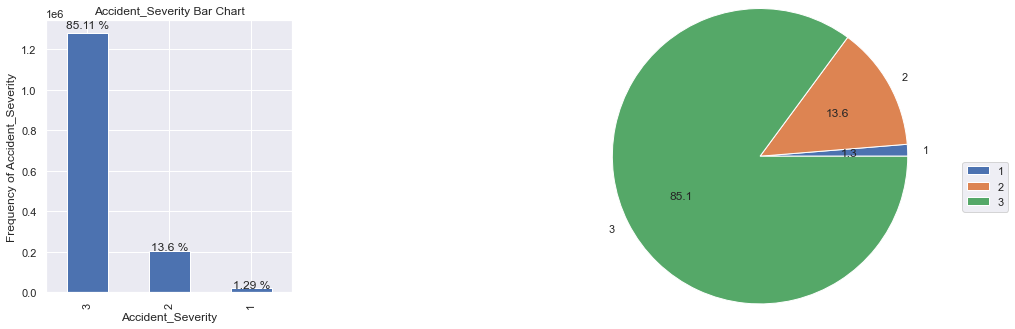

In [209]:
bar_pie_chart(data, "Accident_Severity")

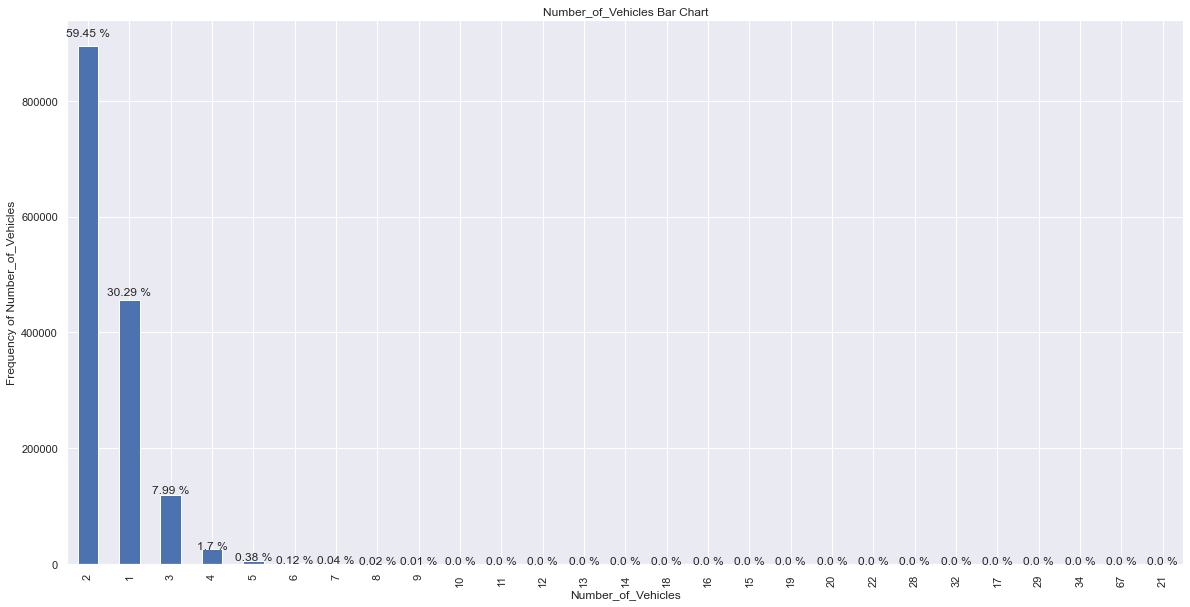

In [210]:
bar_pie_chart(data, "Number_of_Vehicles", pie_chart=False)

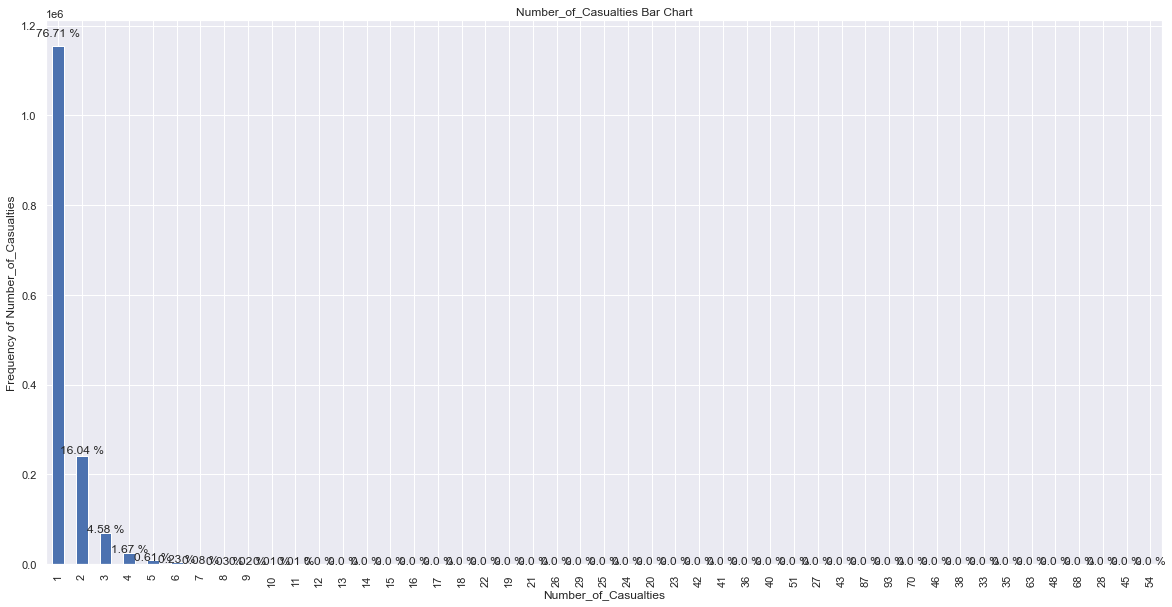

In [211]:
bar_pie_chart(data, "Number_of_Casualties", pie_chart=False)

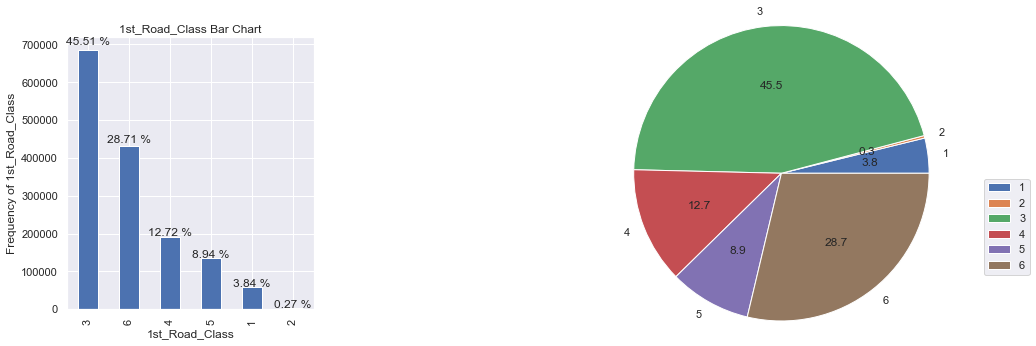

In [212]:
bar_pie_chart(data, "1st_Road_Class")

Poor road quality causes accidents. Almost all of the accidents occurred on the 3rd degree or lower quality roads.

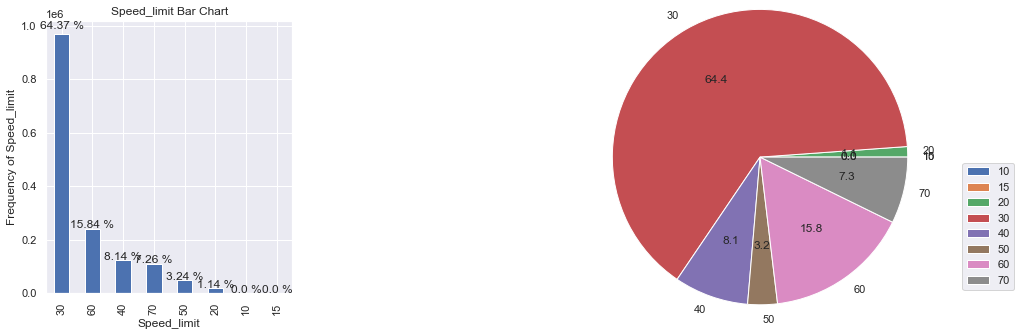

In [213]:
bar_pie_chart(data, "Speed_limit")

Almost 80 % of the accidents occurred on low speed limit roads. It may be due to the speed limit being ignored.

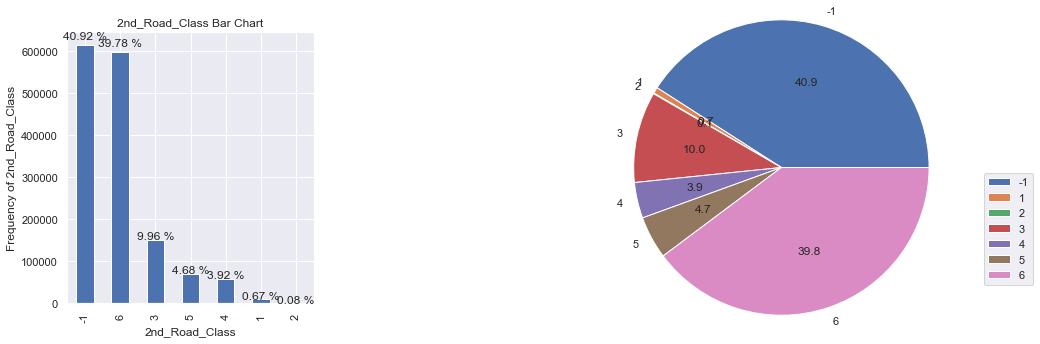

In [214]:
bar_pie_chart(data, "2nd_Road_Class")

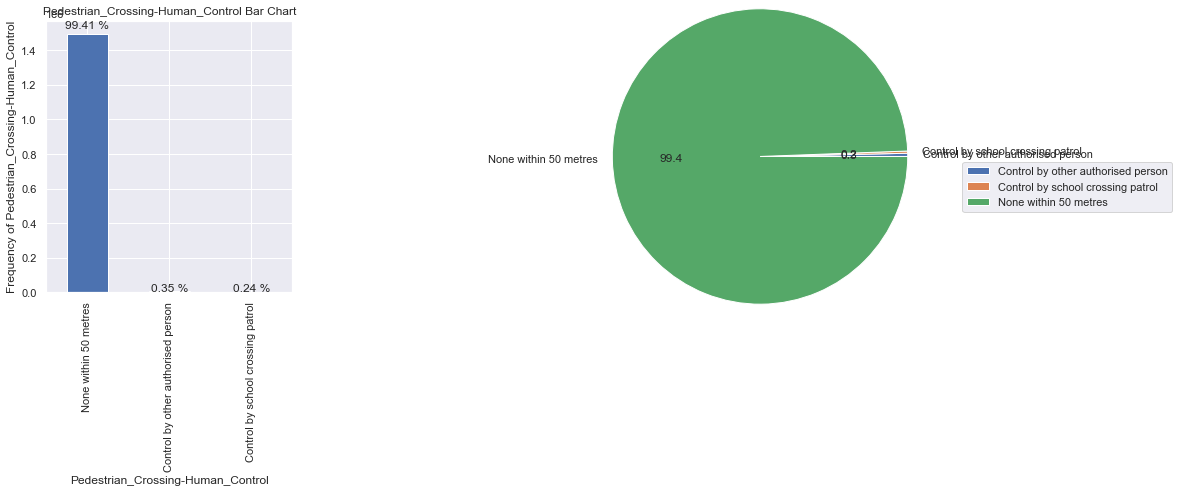

In [215]:
bar_pie_chart(data, "Pedestrian_Crossing-Human_Control")

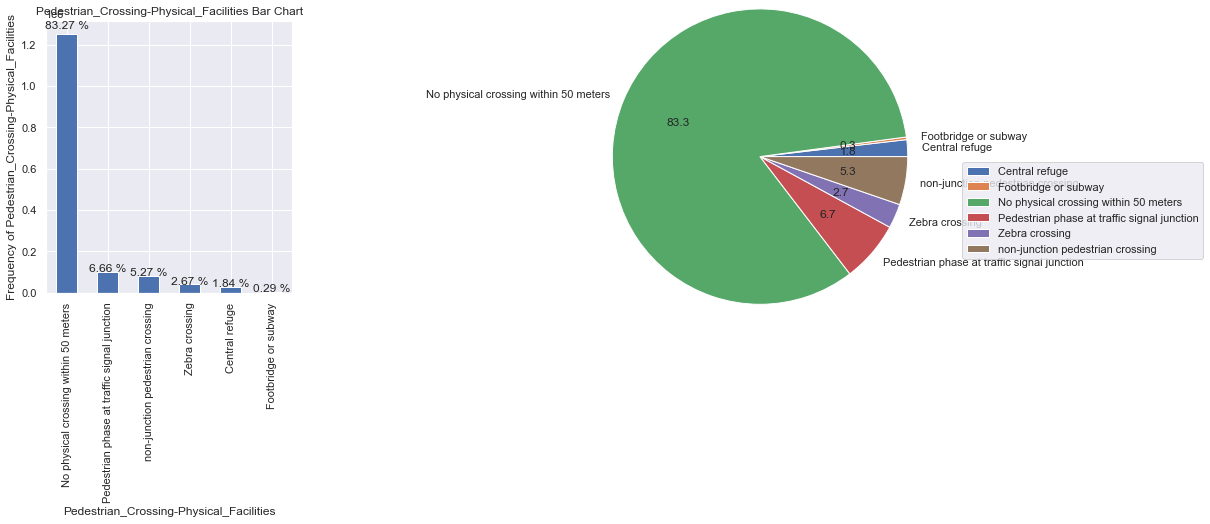

In [216]:
bar_pie_chart(data, "Pedestrian_Crossing-Physical_Facilities")

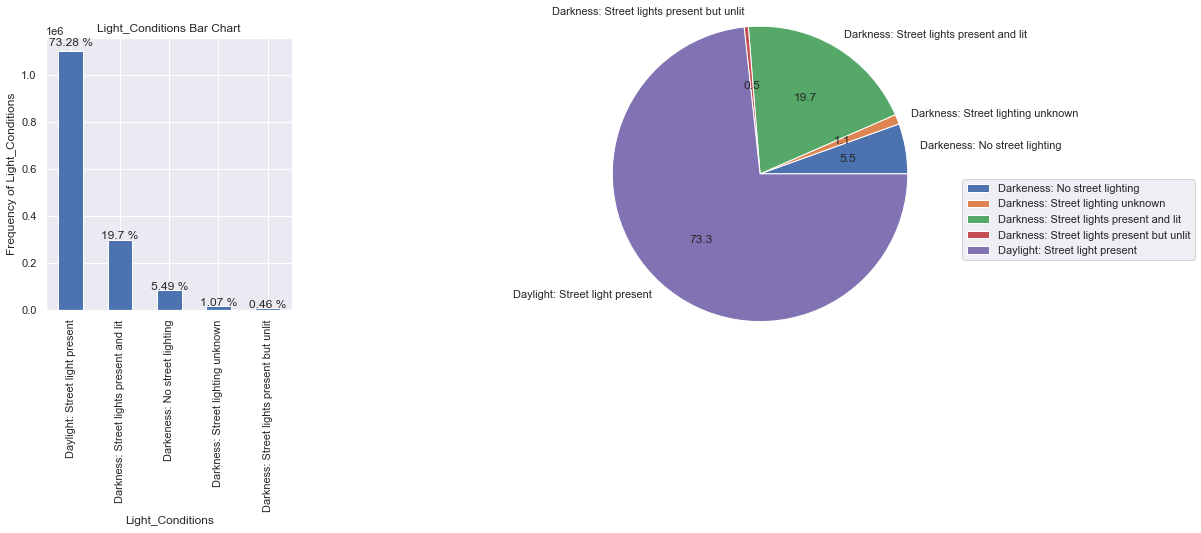

In [217]:
bar_pie_chart(data, "Light_Conditions")

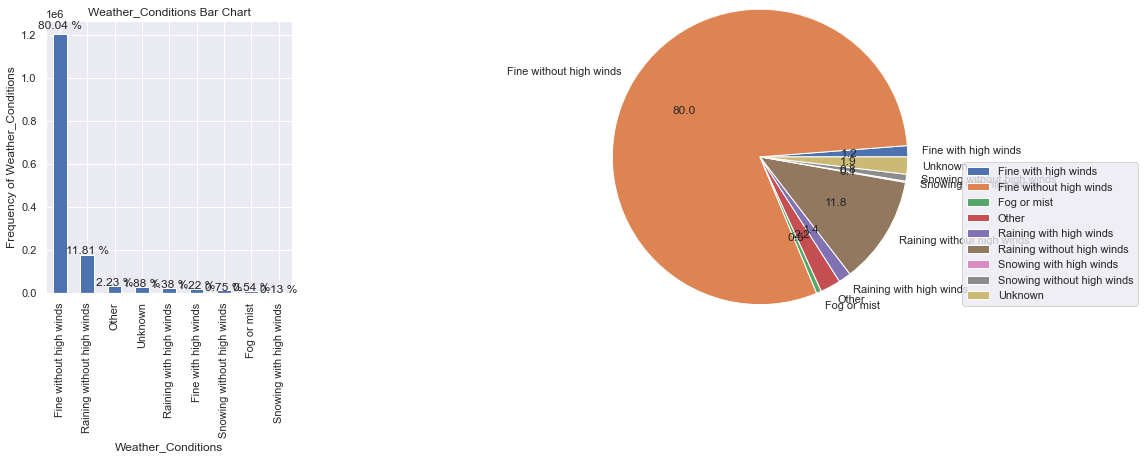

In [218]:
bar_pie_chart(data, "Weather_Conditions")

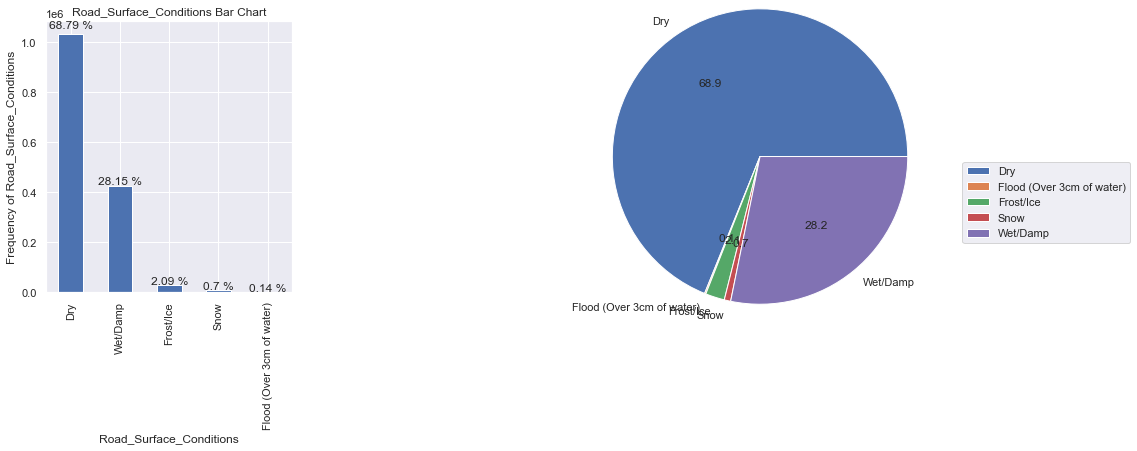

In [219]:
bar_pie_chart(data, "Road_Surface_Conditions")

80 % of the collisions occurred in pleasant weather, "dry" surface conditions and good ligh conditions. This could be attributed to higher traffic density when the weather is nice and.

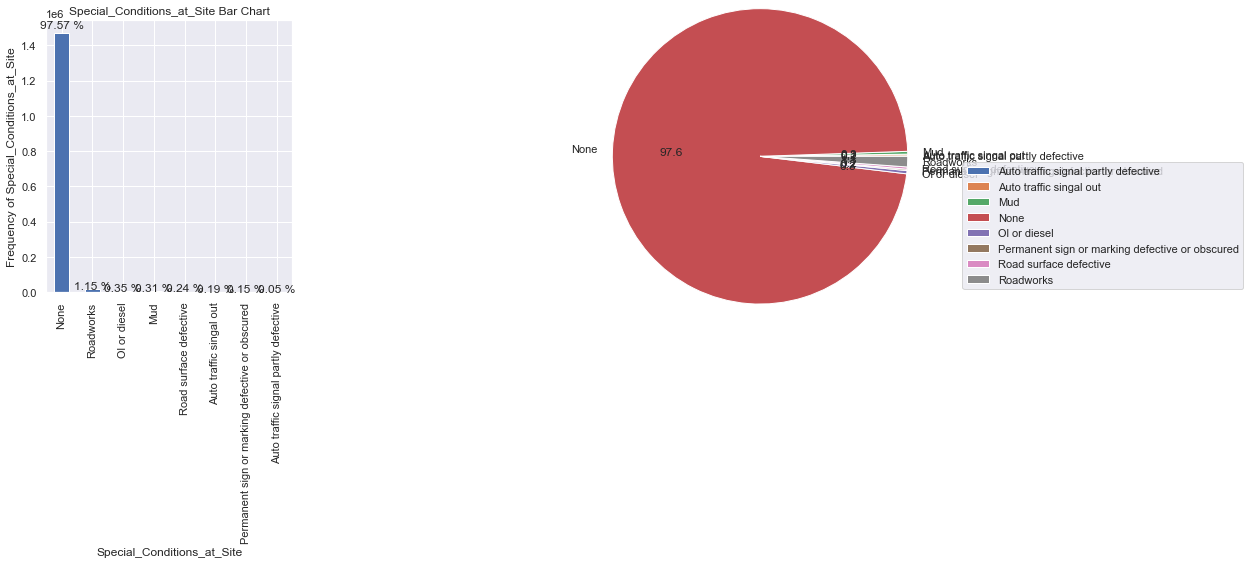

In [220]:
bar_pie_chart(data, "Special_Conditions_at_Site")

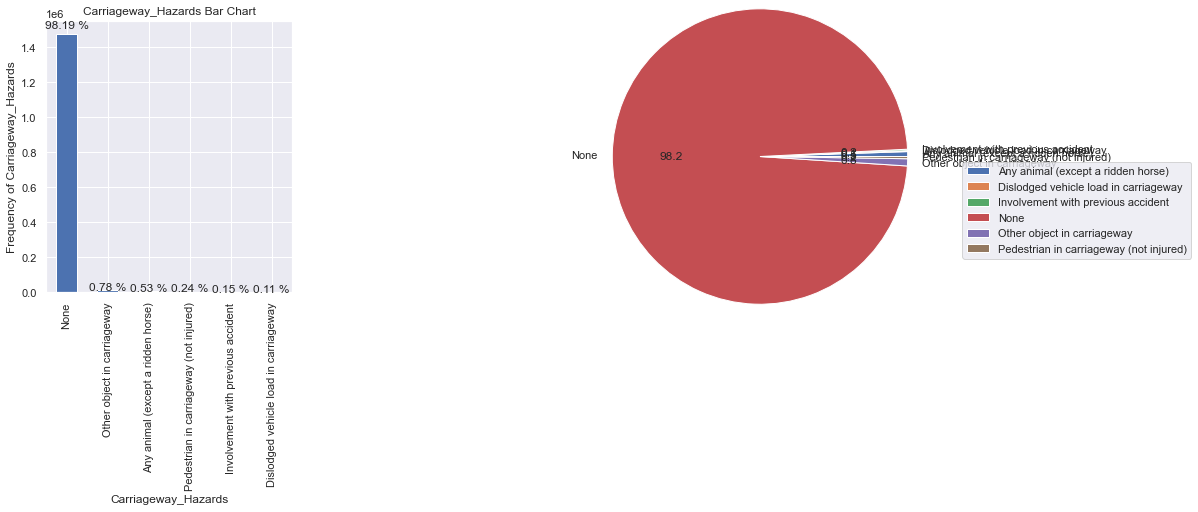

In [221]:
bar_pie_chart(data, "Carriageway_Hazards" )

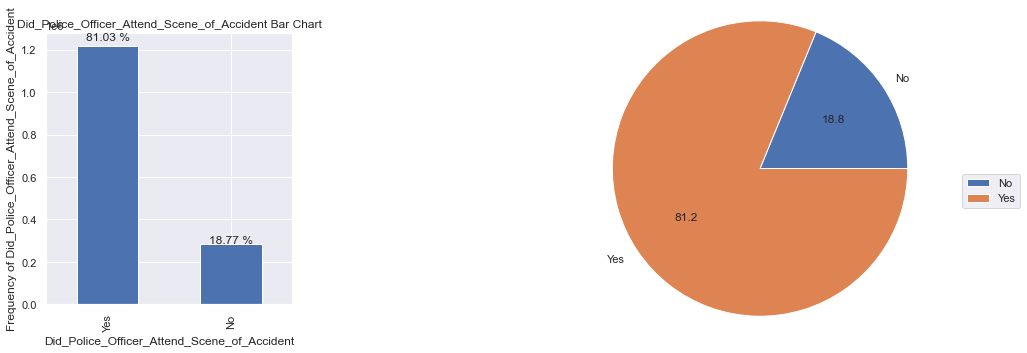

In [222]:
bar_pie_chart(data, "Did_Police_Officer_Attend_Scene_of_Accident" )

__Q4)__ What were the differences between rural and urban areas?

The number of accidents in urban areas is about twice the number of traffic accidents in rural areas. It may be due to the intensity of city traffic and the stress of drivers.


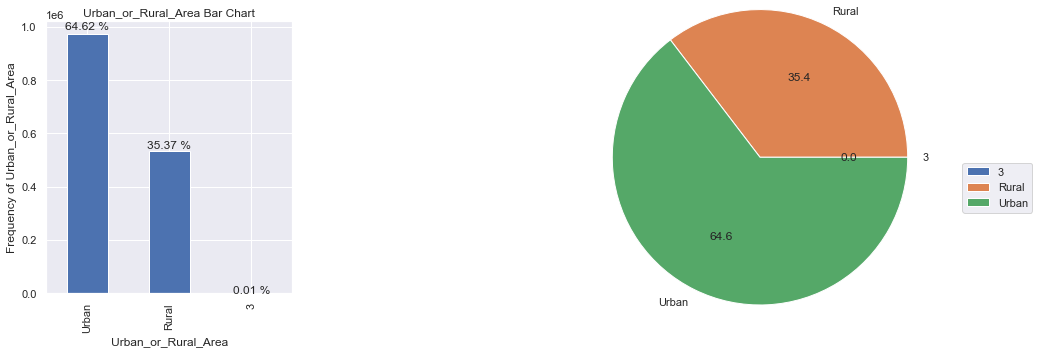

In [223]:
bar_pie_chart(data, "Urban_or_Rural_Area" )

__Q3)__ Estimation with time series analysis has been tried. Estimations were made based on the number of daily accidents. 

# 3) Time Series Forecast 

Time Series Analysis

We explore various methods for forecasting (i.e. predicting) the next value(s) in a time series. A time series is a sequence of observations y1, …, yn. We usually think of the subscripts as representing evenly spaced time intervals (seconds, minutes, months, seasons, years, etc.).

Topics:http://www.real-statistics.com/time-series-analysis/

----------------------------------

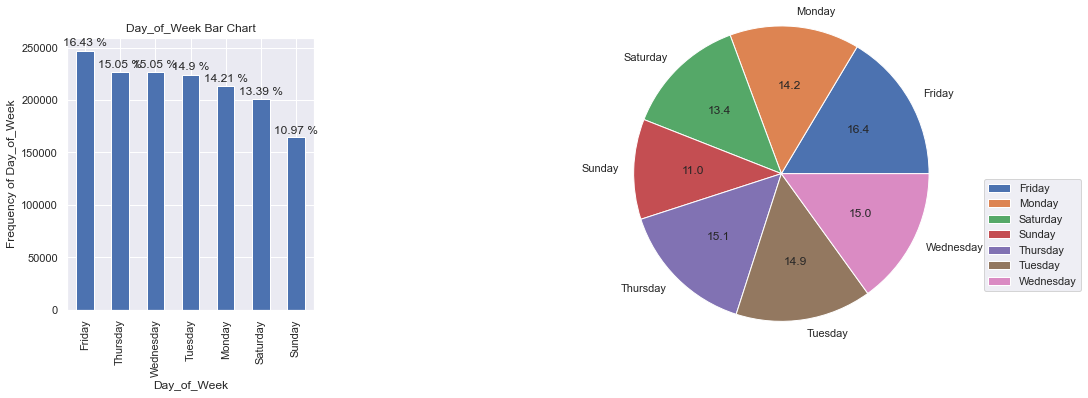

In [224]:
bar_pie_chart(data, "Day_of_Week")

Considering the distribution of traffic accidents by days of the week, the rate of occurrence of traffic accidents at weekends decreases, but this rate tends to increase towards holidays.

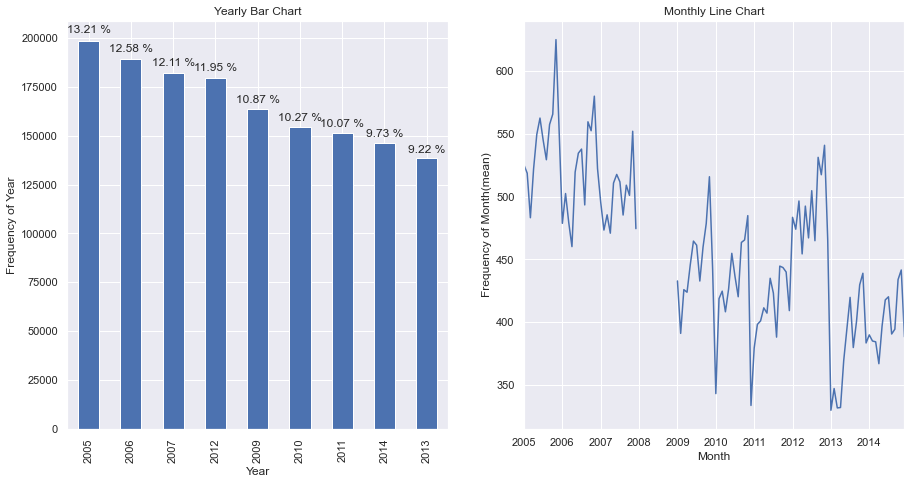

In [225]:
sns.set()
plt.figure(figsize=(15, 7.5))

plt.subplot(1,2,1)
plt1 = data["Year"].value_counts().plot(kind='bar')
plt.title(f"Yearly Bar Chart")
plt1.set(xlabel = f"Year", ylabel=f'Frequency of Year')
for p in plt1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt1.annotate((f"{round((height / len(data))*100, 2)}")+" %", (x + width/2, y + height*1.02), ha='center')
    
sns.set()
plt.subplot(1,2,2)
data_monthly.plot()
plt.title(f"Monthly Line Chart")
plt.xlabel("Month")
plt.ylabel("Frequency of Month(mean)")
plt.show()

Accident rates show a decrease in the data analyzed from 2005 to 2013 (except 2008). ALso, the behavior of the monthly accident numbers mean is shown on the right. According to the graph, the monthly number of accidents mean peaks in Decembers (except 2008). This may be due to the long distance travels that increase during the christmas holiday.

C:\Users\Gaye\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


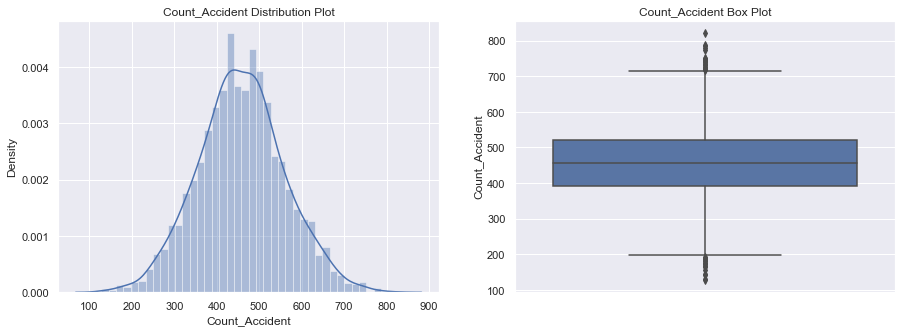

count    3286.000000
mean      457.744979
std       101.820079
min       128.000000
25%       392.000000
50%       457.000000
75%       522.000000
max       822.000000
Name: Count_Accident, dtype: float64

In [226]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title(f'Count_Accident Distribution Plot')
sns.distplot(data_daily)

plt.subplot(1,2,2)
plt.title(f'Count_Accident Box Plot')
sns.boxplot(y=data_daily)

plt.show()
    
data_daily.describe()

In [227]:
# Standard Deviation Method for Gaussian Distribution
col_mean, col_std = np.mean(data_daily), np.std(data_daily)
cut_off = col_std * 3
lower, upper = col_mean - cut_off, col_mean + cut_off
print(f"with outliers: {data_daily.size}")
data_daily.drop(data_daily[(data_daily < lower) | (data_daily > upper)].index, inplace=True)
print(f"non-outliers : {data_daily.size}")

with outliers: 3286
non-outliers : 3277


__3.1) Split Data as train & test__

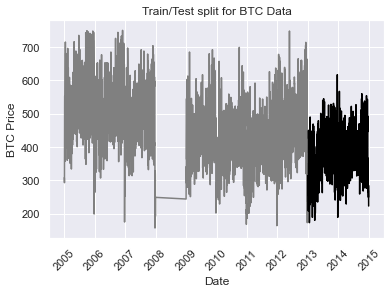

In [228]:
#split train and test dataset
#Sorting is done to include the recent data in the test_data.
data_daily.sort_index()
train = data_daily[data_daily.index < pd.to_datetime("2013-01-01", format='%Y-%m-%d')]
test = data_daily[data_daily.index >= pd.to_datetime("2013-01-01", format='%Y-%m-%d')]

plt.plot(train, color = "grey")
plt.plot(test, color = "black")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

__3.2) Test for stationarity__

__Dickey-fuller Test:__ This is one of the statistical tests for determining whether or not something is stationary.. First we consider the __null hypothesis: The time series is non- stationary.__  The goal is to have Test statistics with a lower critical value than the critical value., in this instance we can reject the null hypothesis and say that this Time series is indeed stationary.


In [229]:
def test_stationarity(data):
    
    #Determing rolling statistics(changed)
    rolmean = data.rolling(30).mean()
    rolstd = data.rolling(30).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(10,5))
    plt.plot(data, color='grey',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    result = adfuller(data, autolag='AIC')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    """note_myself
       print('ADF Statistic: {}'.format(result[0]))
       print('p-value: {}'.format(result[1]))
       print('Critical Values:')
       for key, value in result[4].items():
          print('\t{}: {}'.format(key, value))"""

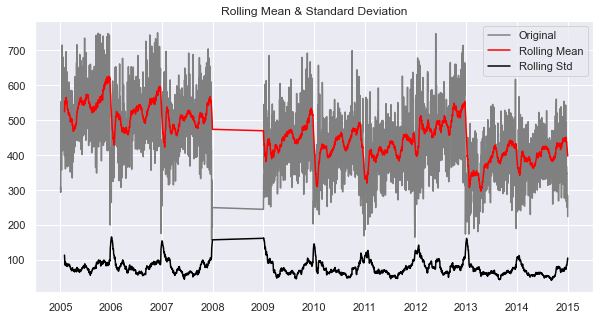

Results of Dickey-Fuller Test:
Test Statistic                   -4.675930
p-value                           0.000093
#Lags Used                       29.000000
Number of Observations Used    3247.000000
Critical Value (1%)              -3.432366
Critical Value (5%)              -2.862431
Critical Value (10%)             -2.567244
dtype: float64


In [230]:
test_stationarity(data_daily)

-P-value les than 0.1, 0.05, and 0.001.

-Test Statistic < All Critical Values.

So, we reject null hypothesis. The time series is stationary with .

We can do forecast now. We

__Model: Seasonal Autoregressive Integrated Moving-Average (SARIMA)__

The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

The method is suitable for univariate time series with trend and/or seasonal components.

p: number of autoregressive terms (AR order)

d: number of nonseasonal differences (differencing order)

q: number of moving-average terms (MA order)


seasonal_orderiterable, optional: The (P,D,Q,s) order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity. D must be an integer indicating the integration order of the process, while P and Q may either be an integers indicating the AR and MA orders (so that all lags up to those orders are included) or else iterables giving specific AR and / or MA lags to include. s is an integer giving the periodicity (number of periods in season), often it is 4 for quarterly data or 12 for monthly data. Default is no seasonal effect.

In [231]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook

C:\Users\Gaye\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Gaye\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


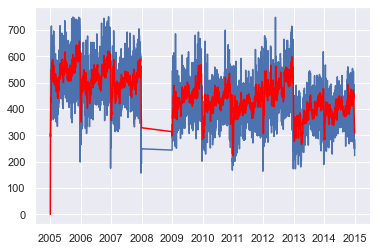

In [232]:
model = SARIMAX(data_daily, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
results = model.fit(disp=False)
plt.plot(data_daily)
plt.plot(results.fittedvalues, color='red')

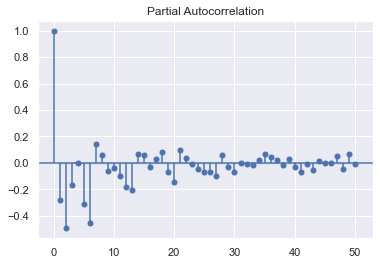

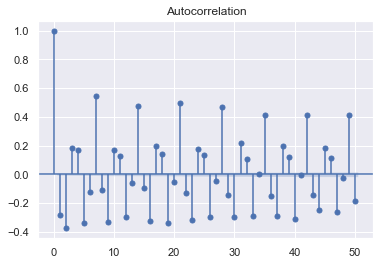

In [233]:
simulated_ARMA_data = ArmaProcess(data_daily.index, data_daily.values).generate_sample(nsample=100000)
plot_pacf(simulated_ARMA_data);
plot_acf(simulated_ARMA_data);

__RSS vs RMSE__

Having the mathematical derivations, you might ask yourself why use one measure over the other to assess the performance of a given model? You could use either, but the advantage of RMSE is that it will come out in more interpretable units. For example, if you were building a model that used house features to predict house prices, RSS would come out in dollars squared and would be a really huge number. RMSE would come out in dollars and its magnitude would make more sense given the range of your house price predictions.

In [234]:
import math
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

In [235]:
x = data_daily.values
y = results.predict()
print(rmse(x,y))


80.11477727719831


__References:__

More details for Dickey-fuller Test : http://www.real-statistics.com/time-series-analysis/stochastic-processes/dickey-fuller-test/

Time series: https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000

SARIMA: https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html